In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from functools import partial
%matplotlib inline

Reading the error results from the autoencoder models:

In [3]:
model_1_1_layer = pd.read_csv("errors_auto_1_layer.csv")
model_2_2_layer = pd.read_csv("errors_auto_2_layer.csv")
model_3_h2o = pd.read_csv("errors_auto_h2o.csv")
model_4_tied_w = pd.read_csv("errors_auto_tied_weights.csv")
model_5_variational = pd.read_csv("errors_auto_variational.csv")

Checking the error plot:

In [4]:
def plot_points(threshold):
    
    error_df=model_5_variational    
    
    groups = error_df.groupby('true_class')
    fig, ax = plt.subplots()

    for name, group in groups:
        ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
    ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
    ax.legend()
    plt.title("Reconstruction error for different classes")
    plt.ylabel("Reconstruction error")
    plt.xlabel("Data point index")
    plt.show();

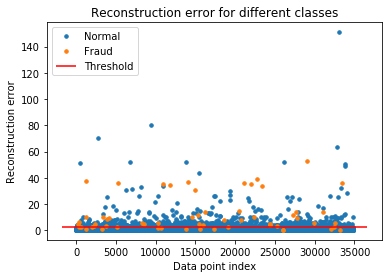

In [5]:
plot_points(2.5)

Checking the confusion matrix plot:

In [6]:
def conf_mat_plot(threshold):
    
    error_df=model_5_variational
    
    y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.true_class, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    f1 = "{:10.4f}".format(f1_score(error_df.true_class, y_pred))
    plt.title("Confusion matrix: F1="+f1)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

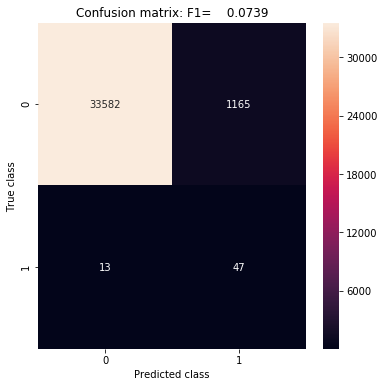

In [7]:
conf_mat_plot(2.5)

A quick test of the interactive widget:

In [8]:
interactive_plot = interactive(conf_mat_plot, threshold=(0, 60))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=30, description='threshold', max=60), Output(layout=Layout(height='350px…

Testing plotting the error and the confusion matrix:

In [9]:
def threshold_plot(threshold):
    
    error_df=model_5_variational    
    
    groups = error_df.groupby('true_class')
    
    
    fig, ax = plt.subplots(1,2,figsize=(14,4))
    
    plt.subplot(1, 2, 1)
    for name, group in groups:
        plt.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
    plt.ylim(0, 100)
    plt.axhline(y=threshold, xmin=0, xmax=200, hold=None,color='r')
    #ax[0].hlines(threshold, ax[0].get_xlim(), ax[0].get_xlim(), colors="r", zorder=100, label='Threshold')
    plt.legend()
    plt.title("Reconstruction error for different classes")
    plt.ylabel("Reconstruction error")
    plt.xlabel("Data point index")

    
    
    y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.true_class, y_pred)
    #plt.figure(figsize=(6, 6))
    #plt.imshow(conf_matrix)
    plt.subplot(2, 2, 2)
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    f1 = "{:10.4f}".format(f1_score(error_df.true_class, y_pred))
    plt.title("Confusion matrix: F1="+f1)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
 
    plt.show()

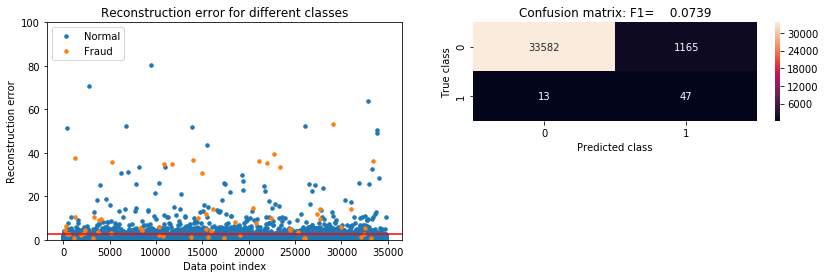

In [10]:
threshold_plot(2.5)

In [11]:
interactive_plot = interactive(threshold_plot, threshold=(0.0, 60.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=30.0, description='threshold', max=60.0), Output(layout=Layout(height=…

Creating a function to plot all the models:

In [12]:
def threshold_plot_models(threshold,error_df,model_name):   
    
    groups = error_df.groupby('true_class')
    y_max = error_df.reconstruction_error.max()
    
    fig, ax = plt.subplots(1,2,figsize=(14,5))
    
    plt.subplot(1, 2, 1)
    for name, group in groups:
        plt.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
    plt.ylim(0, y_max*0.8)
    plt.axhline(y=threshold, xmin=0, xmax=200, hold=None,color='r')
    #ax[0].hlines(threshold, ax[0].get_xlim(), ax[0].get_xlim(), colors="r", zorder=100, label='Threshold')
    plt.legend()
    plt.title("Reconstruction error for different classes")
    plt.ylabel("Reconstruction error")
    plt.xlabel("Data point index")
    plt.suptitle(model_name, fontsize=12)
    
    
    y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.true_class, y_pred)
    #plt.figure(figsize=(6, 6))
    #plt.imshow(conf_matrix)
    plt.subplot(2, 2, 2)
    #sns.set(font_scale=1)
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    f1 = "{:10.4f}".format(f1_score(error_df.true_class, y_pred))
    plt.title("Confusion matrix: F1="+f1)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
 
    plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
    
    plt.show()

In [13]:
def threshold_plots(threshold):
    
    threshold_plot_models(threshold,model_1_1_layer,'Autoencoder 1 layer')
    threshold_plot_models(threshold,model_2_2_layer,'Autoencoder 2 encoding layers')
    threshold_plot_models(threshold,model_3_h2o,'Autoencoder 2 encoding layers-H2O')
    threshold_plot_models(threshold,model_4_tied_w,'Autoencoder 2 encoding layers-Tied Weights')
    threshold_plot_models(threshold,model_5_variational,'Variational Autoencoder 2 encoding layers')

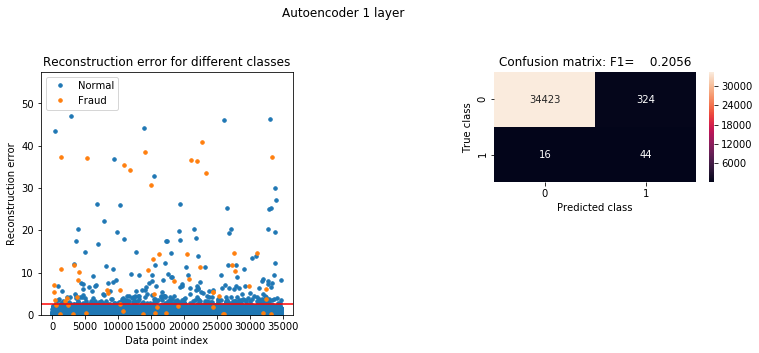

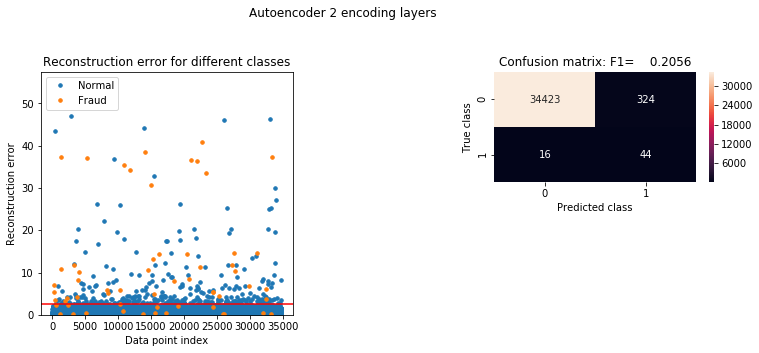

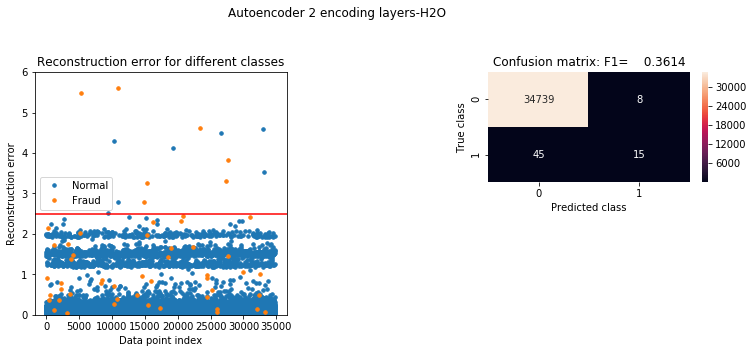

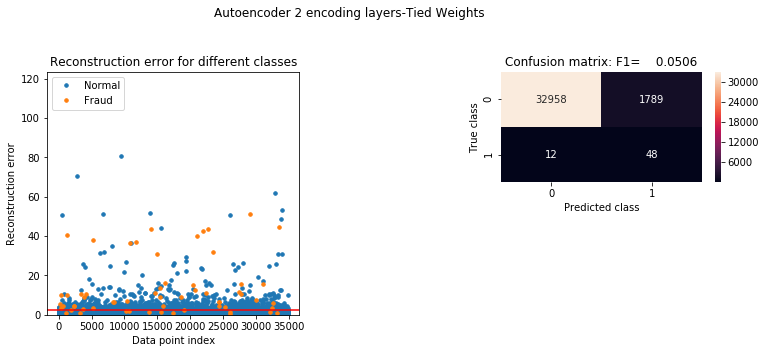

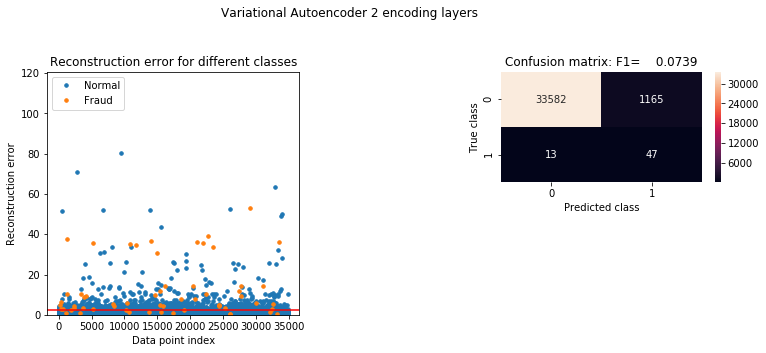

In [14]:
threshold_plots(2.5)

### Interactive Plot

Changing the threshold interactively:

In [16]:
interactive_plot = interactive(threshold_plots, threshold=(0.0, 10.0),continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '1350px'
interactive_plot

interactive(children=(FloatSlider(value=5.0, description='threshold', max=10.0), Output(layout=Layout(height='…

Changing the threshold manually:

In [17]:
from ipywidgets import FloatSlider

In [18]:
interact_manual(threshold_plots,threshold=FloatSlider(min=0, max=10, step=0.1))
output = interactive_plot.children[-1]
output.layout.height = '1350px'
interactive_plot;

interactive(children=(FloatSlider(value=0.0, description='threshold', max=10.0), Button(description='Run Inter…

## Fraud Cost

In [21]:
def model_predictions(threshold,error_df):   
    
    y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
    return y_pred

In [42]:
def total_fraud_cost(X,y_actual,y_pred):
    
    df_cost = pd.concat([X,y_actual.rename(columns={y_test.columns[0] : 'actual'}),y_pred.rename(
    columns={y_pred.columns[0]: 'predicted'})],axis=1)
    
    fp_cost = df_cost[(df_cost.actual==0) & (df_cost.predicted==1)].Amount.sum()*0.5
    merchant_fee_cost = (1.75/100)*fp_cost
    fn_cost = df_cost[(df_cost.actual==1) & (df_cost.predicted==0)].Amount.sum()
    total_cost = fp_cost + merchant_fee_cost + fn_cost
    return total_cost

In [62]:
y_pred_m1 = model_predictions(1.8,model_1_1_layer)
y_pred_m2 = model_predictions(1.8,model_2_2_layer)
y_pred_m3 = model_predictions(0.4,model_3_h2o)
y_pred_m4 = model_predictions(2.6,model_4_tied_w)
y_pred_m5 = model_predictions(2.4,model_5_variational)

In [27]:
X_test=pd.read_csv('C:/Users/prodi/Documents/SCU/Machine Learning/Final Project/Credit card/data/X_test.csv')
y_test=pd.read_csv('C:/Users/prodi/Documents/SCU/Machine Learning/Final Project/Credit card/data/y_test.csv')

In [63]:
total_fraud_cost(X_test,y_test,pd.DataFrame(y_pred_m1,columns=['pred']))
total_fraud_cost(X_test,y_test,pd.DataFrame(y_pred_m2,columns=['pred']))
total_fraud_cost(X_test,y_test,pd.DataFrame(y_pred_m3,columns=['pred']))
total_fraud_cost(X_test,y_test,pd.DataFrame(y_pred_m4,columns=['pred']))
total_fraud_cost(X_test,y_test,pd.DataFrame(y_pred_m5,columns=['pred']))

151748.92721249998

151748.92721249998

115356.9321375

246279.17515

256256.851375